# GRIP TASK 1: Prediction using Supervised ML
 ## Author: Akila Umesh



### Problem Statement
Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.


Since we're trying to predict a number, this is a reagression problem.
This is a simple linear regression task as it involves just two variables.


### Importing the data and preparing it for modelling

In [40]:
# Regular EDA and plotting tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plot to appear in the notebook
%matplotlib inline

# Model
from sklearn.linear_model import LinearRegression

# Model evaluators
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

### Load Data

In [41]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully!")

Data imported successfully!


### Data Exploration (Exploratory Data Analysis or EDA)

In [42]:
# Let's check the top 5 rows of our dataframe
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [43]:
print(data.shape)

(25, 2)


In [44]:
# Check the last 5 rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [45]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


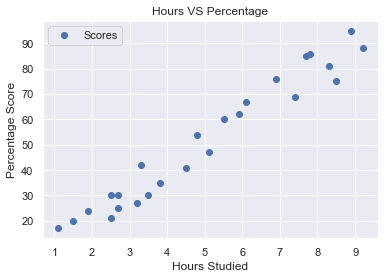

In [47]:
# Plotting the distribution of scores
data.plot(x="Hours", y="Scores", style='o')
plt.title("Hours VS Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

From the graph above, we can clearly see that there is a positive relation between the number of hours studied and the percentage of score.

In [48]:
# Find the correlation 
corr_matrix = data.corr()
corr_matrix

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


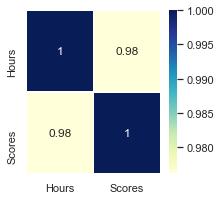

In [49]:
# Let's make it look a little prettier
plt.figure(figsize=(3, 3))
sns.set(font_scale=1.0)
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           cmap="YlGnBu")
plt.show()

### Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).



In [50]:
# Atrributes
X = data.drop("Scores", axis=1)

# Labels
y = data["Scores"]

### Training and test split

The next step is to split this data into training and test sets.

To split our data into a training and test set, we can use Scikit-Learn's train_test_split() and feed it our independent and dependent variables (X & y).


In [51]:
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=0) 

### Training the Algorithm

In [52]:
# Instantiate the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training Complete!")

Training Complete!


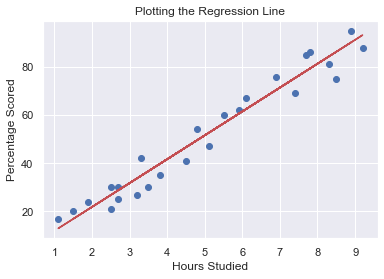

In [53]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, c="r")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.title("Plotting the Regression Line")
plt.show()

### Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.



In [54]:
y_pred = regressor.predict(X_test)

In [55]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.reset_index(inplace=True)
df

,index,Actual,Predicted
0,5,20,16.884145
1,2,27,33.732261
2,19,69,75.357018
3,16,30,26.794801
4,11,62,60.491033


### Testing with our own data

In [56]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
hours = 9.25
score = regressor.predict([[hours]])
print(f"Number of Hours: {hours}")
print(f"Predicted Score: {score[0]}")  

Number of Hours: 9.25
Predicted Score: 93.69173248737538


### Evaluating the model

Finally, let's evaluate our trained model by calculating the Mean Absolute Error (MAE).

In [57]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Mean Absolute Error: 4.183859899002975
